In [1]:
import mujoco
import mediapy as media
import matplotlib.pyplot as plt
import time
import itertools

In [2]:
xml_path = "./xml/agility_cassie/cassie.xml"
model = mujoco.MjModel.from_xml_path(xml_path)  # MuJoCo model
data = mujoco.MjData(model)

""

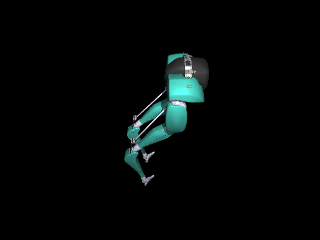

In [3]:
renderer = mujoco.Renderer(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

In [1]:
import numpy as np
from scipy.optimize import minimize

# 定义六杆机构的连杆长度
L1 = 1
L2 = 2
L3 = 3
L4 = 4
L5 = 5
L6 = 6

# 定义目标末端位置和姿态
target_position = np.array([1, 2])
target_orientation = 0

# 定义逆向运动学求解函数
def inverse_kinematics(angles):
    x = L1 * np.cos(angles[0]) + L2 * np.cos(angles[1]) + L3 * np.cos(angles[2]) - L4 * np.cos(angles[3]) - L5 * np.cos(angles[4]) - L6 * np.cos(angles[5])
    y = L1 * np.sin(angles[0]) + L2 * np.sin(angles[1]) + L3 * np.sin(angles[2]) - L4 * np.sin(angles[3]) - L5 * np.sin(angles[4]) - L6 * np.sin(angles[5])
    return np.array([x, y])

# 定义目标函数
def objective_function(angles):
    return np.linalg.norm(inverse_kinematics(angles) - target_position)

# 初始化初始猜测角度
initial_angles = np.array([0, 0, 0, 0, 0, 0])

# 使用优化算法求解逆向运动学
result = minimize(objective_function, initial_angles, method='SLSQP')

# 输出结果
if result.success:
    inverse_angles = result.x
    print("逆向运动学求解成功！")
    print("连杆角度:", inverse_angles)
    print("末端位置:", inverse_kinematics(inverse_angles))
else:
    print("逆向运动学求解失败！")

逆向运动学求解成功！
连杆角度: [-0.35130841 -1.10382832 -2.16508578 -0.84256666 -1.05798073 -3.26299226]
末端位置: [1.00000483 1.99999723]


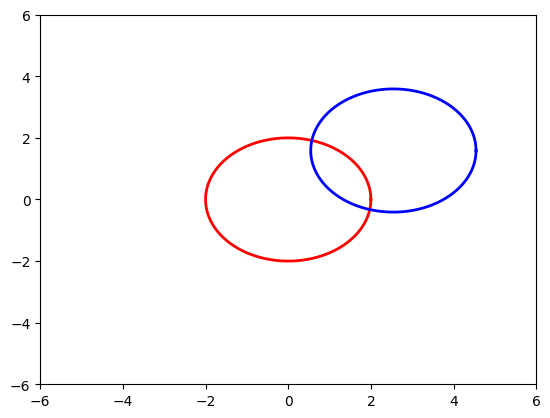

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

class CrankRocker:
    def __init__(self, crank_length, rocker_length):
        self.crank_length = crank_length
        self.rocker_length = rocker_length
        self.theta = np.linspace(0, 2*np.pi, 100)  # 角度范围
        self.crank_angle = np.radians(30)  # 曲柄初始角度
        
    def calculate_positions(self):
        x_crank = self.crank_length * np.cos(self.theta)  # 曲柄的x坐标
        y_crank = self.crank_length * np.sin(self.theta)  # 曲柄的y坐标
        
        x_rocker = self.crank_length * np.cos(self.theta) + self.rocker_length * np.cos(self.crank_angle)  # 摇杆的x坐标
        y_rocker = self.crank_length * np.sin(self.theta) + self.rocker_length * np.sin(self.crank_angle)  # 摇杆的y坐标
        
        return x_crank, y_crank, x_rocker, y_rocker
    
    def update(self, frame):
        self.crank_angle += np.radians(1)  # 每帧更新曲柄角度
        x_crank, y_crank, x_rocker, y_rocker = self.calculate_positions()
        crank.set_data(x_crank, y_crank)
        rocker.set_data(x_rocker, y_rocker)
        return crank, rocker

# 创建曲柄摇杆机构对象
cr = CrankRocker(2, 3)

# 初始化图形
fig, ax = plt.subplots()
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
crank, = ax.plot([], [], 'r-', lw=2)  # 曲柄
rocker, = ax.plot([], [], 'b-', lw=2)  # 摇杆

# 创建动画
ani = animation.FuncAnimation(fig, cr.update, frames=100, interval=50, blit=True)

# 显示动画
plt.show()

In [6]:
import pygame
import math

# 定义机构参数
L1 = 100  # 曲柄长度
L2 = 200  # 摇杆长度
theta = 0  # 曲柄角度

# 初始化Pygame
pygame.init()
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
clock = pygame.time.Clock()

class CrankRocker:
    def __init__(self, L1, L2):
        self.L1 = L1
        self.L2 = L2

    def update(self, dt):
        global theta
        # 更新曲柄角度
        omega = 2 * math.pi  # 曲柄角速度，每秒转动一圈
        theta += omega * dt

    def draw(self, screen):
        # 计算摇杆位置
        x1 = width // 2
        y1 = height // 2
        x2 = x1 + self.L1 * math.cos(theta)
        y2 = y1 + self.L1 * math.sin(theta)
        x3 = x2 + self.L2 * math.cos(theta)
        y3 = y2 + self.L2 * math.sin(theta + math.pi)

        # 绘制机构
        pygame.draw.line(screen, (255, 255, 255), (x1, y1), (x2, y2), 2)  # 绘制曲柄
        pygame.draw.line(screen, (255, 255, 255), (x2, y2), (x3, y3), 2)  # 绘制摇杆
        pygame.draw.circle(screen, (255, 0, 0), (x1, y1), 5)  # 绘制曲柄轴点
        pygame.draw.circle(screen, (0, 0, 255), (x2, y2), 10)  # 绘制摇杆轴点

# 创建曲柄摇杆机构对象
crank_rocker = CrankRocker(L1, L2)

# 主循环
running = True
while running:
    dt = clock.tick(60) / 1000  # 计算每帧的时间间隔，单位为秒

    # 处理事件
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # 更新机构状态
    crank_rocker.update(dt)

    # 绘制场景
    screen.fill((0, 0, 0))
    crank_rocker.draw(screen)
    pygame.display.flip()

# 退出程序
pygame.quit()

In [7]:
import pygame
import math

# 定义机构参数
L1 = 100  # 曲柄长度
L2 = 200  # 摇杆长度
L3 = 250  # 连接杆长度
theta = 0  # 曲柄角度

# 初始化Pygame
pygame.init()
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
clock = pygame.time.Clock()

class CrankRocker:
    def __init__(self, L1, L2, L3):
        self.L1 = L1
        self.L2 = L2
        self.L3 = L3

    def update(self, dt):
        global theta
        # 更新曲柄角度
        omega = 2 * math.pi  # 曲柄角速度，每秒转动一圈
        theta += omega * dt

    def draw(self, screen):
        # 计算机构各杆的位置
        x1 = width // 2
        y1 = height // 2
        x2 = x1 + self.L1 * math.cos(theta)
        y2 = y1 + self.L1 * math.sin(theta)
        x3 = x2 + self.L2 * math.cos(theta + math.pi)
        y3 = y2 + self.L2 * math.sin(theta + math.pi)
        x4 = x3 + self.L3 * math.cos(theta + math.pi / 2)
        y4 = y3 + self.L3 * math.sin(theta + math.pi / 2)

        # 绘制机构
        pygame.draw.line(screen, (255, 255, 255), (x1, y1), (x2, y2), 2)  # 绘制曲柄
        pygame.draw.line(screen, (255, 255, 255), (x2, y2), (x3, y3), 2)  # 绘制摇杆
        pygame.draw.line(screen, (255, 255, 255), (x3, y3), (x4, y4), 2)  # 绘制连接杆
        pygame.draw.circle(screen, (255, 0, 0), (x1, y1), 5)  # 绘制曲柄轴点
        pygame.draw.circle(screen, (0, 0, 255), (x2, y2), 10)  # 绘制摇杆轴点

# 创建曲柄摇杆机构对象
crank_rocker = CrankRocker(L1, L2, L3)

# 主循环
running = True
while running:
    dt = clock.tick(60) / 1000  # 计算每帧的时间间隔，单位为秒

    # 处理事件
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # 更新机构状态
    crank_rocker.update(dt)

    # 绘制场景
    screen.fill((0, 0, 0))
    crank_rocker.draw(screen)
    pygame.display.flip()

# 退出程序
pygame.quit()

In [8]:
import math

# 正运动学求解
def forward_kinematics(crank_length, connecting_rod_length, rocker_length, crank_angle):
    crank_angle_rad = math.radians(crank_angle)
    crank_position = complex(crank_length * math.cos(crank_angle_rad), crank_length * math.sin(crank_angle_rad))
    connecting_rod_angle = math.acos((rocker_length**2 - connecting_rod_length**2 - abs(crank_position)**2) / (-2 * connecting_rod_length * abs(crank_position)))
    rocker_position = complex(connecting_rod_length * math.cos(connecting_rod_angle), connecting_rod_length * math.sin(connecting_rod_angle))
    return abs(rocker_position)

# 逆运动学求解
def inverse_kinematics(crank_length, connecting_rod_length, rocker_length, rocker_position):
    connecting_rod_angle = math.acos((rocker_length**2 - connecting_rod_length**2 - rocker_position**2) / (-2 * connecting_rod_length * rocker_position))
    crank_position = complex(connecting_rod_length * math.cos(connecting_rod_angle), connecting_rod_length * math.sin(connecting_rod_angle))
    crank_angle = math.degrees(math.atan2(crank_position.imag, crank_position.real))
    return crank_angle

# 测试正运动学求解
crank_length = 10
connecting_rod_length = 15
rocker_length = 20
crank_angle = 45
rocker_position = forward_kinematics(crank_length, connecting_rod_length, rocker_length, crank_angle)
print("Rocker position:", rocker_position)

# 测试逆运动学求解
rocker_position = 25
crank_angle = inverse_kinematics(crank_length, connecting_rod_length, rocker_length, rocker_position)
print("Crank angle:", crank_angle)

Rocker position: 14.999999999999998
Crank angle: 53.13010235415598


$$
l_1 e^{j\theta_1} + l_2 e^{j\theta_2} + l_3 e^{j\theta_3} - l_4 e^{j*\theta_4}=0
$$

In [2]:
import numpy as np
l1 = 1
l2 = 2
l3 = 3
l4 = 4
theta1 = np.pi/4
theta2 = np.pi/3
theta3 = np.pi/6

# 构建方程组
A = np.array([[l1*np.cos(theta1), l2*np.cos(theta2), l3*np.cos(theta3)],
              [l1*np.sin(theta1), l2*np.sin(theta2), l3*np.sin(theta3)]])
b = np.array([l4*np.cos(theta4), l4*np.sin(theta4)])

# 求解方程组
x = np.linalg.solve(A, b)

# 计算第四个角度
theta4 = np.arctan2(x[1], x[0])

print("第四个角度 theta4 =", theta4)

NameError: name 'theta4' is not defined

In [10]:
from sympy import symbols, Eq, solve, exp, I, re, im
import math

定义连杆类，可以自定义连杆长度、连接方式、弹簧位置和刚度
求解：
正逆运动学
动力学
连杆形变能跳跃的高度

In [25]:
# 定义符号变量
l1, l2, l3, l4, theta1, theta2, theta3, theta4 = symbols('l1 l2 l3 l4 theta1 theta2 theta3 theta4')

# 定义方程
eq = Eq(l1*exp(I*theta1) + l2*exp(I*theta2) + l3*exp(I*theta3), l4*exp(I*theta4))

# 求解方程
solutions = solve(eq, theta2, theta3)

# 打印解
for solution in solutions:
    print("theta2,3 =", solution)

l1_val = 1
l2_val = 2
l3_val = 1
l4_val = 2

theta1_val = math.pi/2
theta2_val = 0
theta4_val = 0

# theta3_val = solutions[0].subs([(l1, l1_val), (l2, l2_val), (l3, l3_val), (l4, l4_val),
#                                (theta1, theta1_val), (theta4, theta4_val)])

# print("theta3 =", theta3_val)

# real_part = re(theta3_val)
# imaginary_part = im(theta3_val)

# # 计算实数值
# print(real_part.evalf())
# print(imaginary_part.evalf())


theta2,3 = (-I*log(-(l1*exp(I*theta1) + l3*exp(I*theta3) - l4*exp(I*theta4))/l2), theta3)


In [12]:
class Spring:
    def __init__(self, mass, stiffness, initial_length):
        self.mass = mass
        self.stiffness = stiffness
        self.initial_length = initial_length
        self.compressed_length = 0
        self.energy = 0

    def compress(self, length):
        self.compressed_length = length
        self.energy = 0.5 * self.stiffness * self.compressed_length**2

    def release(self):
        self.energy = 0
        self.compressed_length = 0

    def jump_height(self):
        return self.energy / (self.mass * 9.8)

# 示例用法
spring = Spring(0.5, 100, 1)  # 弹簧质量为0.5kg，劲度系数为100N/m，初始长度为1m
spring.compress(0.5)  # 压缩弹簧到0.5m
print("压缩后的能量：", spring.energy)
spring.release()  # 释放弹簧
print("释放后的能量：", spring.energy)
print("跳跃高度：", spring.jump_height())

压缩后的能量： 12.5
释放后的能量： 0
跳跃高度： 0.0


AttributeError: 'SpringJumpAnimation' object has no attribute 'FuncAnimation'

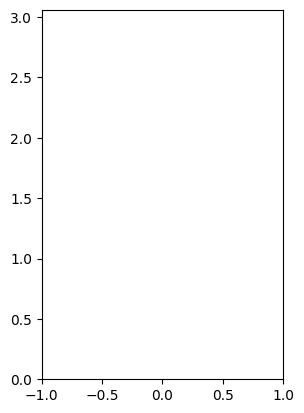

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class Spring:
    def __init__(self, mass, stiffness, initial_length, rebound_coefficient):
        self.mass = mass
        self.stiffness = stiffness
        self.initial_length = initial_length
        self.compressed_length = 0
        self.energy = 0
        self.rebound_coefficient = rebound_coefficient

    def compress(self, length):
        self.compressed_length = length
        self.energy = 0.5 * self.stiffness * self.compressed_length**2

    def release(self):
        released_energy = self.energy * self.rebound_coefficient
        self.energy -= released_energy
        self.compressed_length = 0

    def jump_height(self):
        return self.energy / (self.mass * 9.8)

class SpringJumpAnimation:
    def __init__(self, spring):
        self.spring = spring
        self.fig, self.ax = plt.subplots()
        self.line, = self.ax.plot([], [], 'o-', lw=2)
        self.ax.set_xlim(-1, 1)
        self.ax.set_ylim(0, spring.jump_height() * 1.2)
        self.ax.set_aspect('equal')
        self.animation = None

    def init(self):
        self.line.set_data([], [])
        return self.line,

    def update(self, frame):
        self.spring.release()
        self.line.set_data([0], [self.spring.jump_height()])
        return self.line,

    def start_animation(self):
        self.animation = animation.FuncAnimation(self.fig, self.update, frames=range(100), init_func=self.init, blit=True)
        plt.show()

# 示例用法
spring = Spring(0.5, 100, 1, 0.8)  # 弹簧质量为0.5kg，劲度系数为100N/m，初始长度为1m，回弹系数为0.8
spring.compress(0.5)  # 压缩弹簧到0.5m

animation = SpringJumpAnimation(spring)
animation.start_animation()

/home/yyfyyf/anaconda3/envs/test01/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yyfyyf/anaconda3/envs/test01/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yyfyyf/anaconda3/envs/test01/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yyfyyf/anaconda3/envs/test01/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31227 (\N{CJK UNIFIED IDEOGRAPH-79FB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


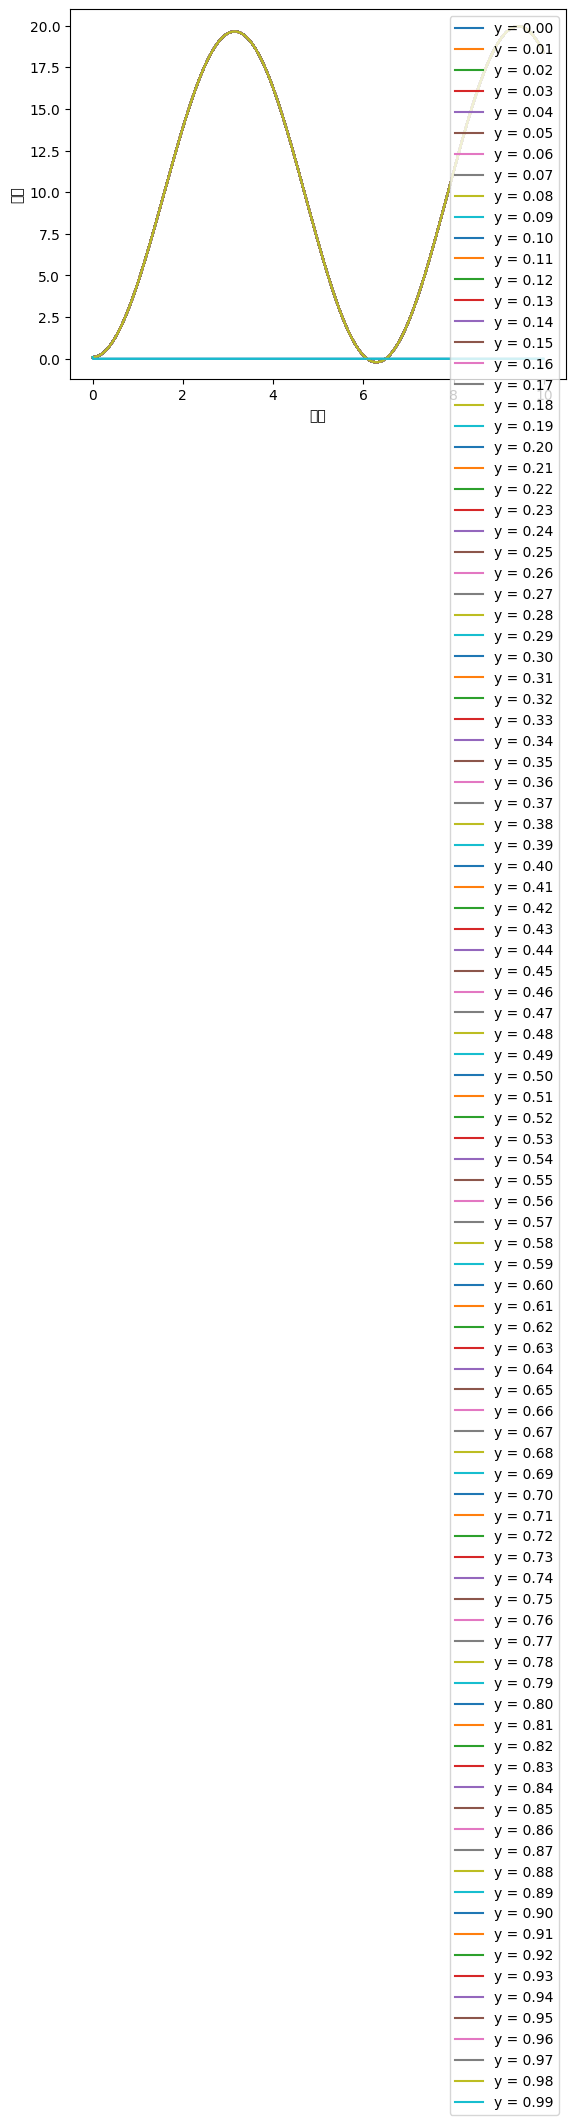

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 定义弹簧的参数
L = 1.0  # 弹簧的长度
m = 1.0  # 弹簧的质量
k = 1.0  # 弹簧的弹性系数
g = 9.8  # 重力加速度

# 定义时间和空间的离散化步长
dt = 0.01  # 时间步长
dy = 0.01  # 空间步长

# 定义时间和空间的网格
t = np.arange(0, 10, dt)  # 时间网格
y = np.arange(0, L, dy)  # 空间网格

# 初始化弹簧上每个位置的位移和速度
u = np.zeros((len(y), len(t)))  # 位移
v = np.zeros((len(y), len(t)))  # 速度

# 设置初始条件
u[:, 0] = 0.1  # 初始位移
v[:, 0] = 0.0  # 初始速度

# 迭代求解差分方程
for i in range(1, len(t)):
    for j in range(1, len(y)-1):
        # 计算位移和速度的二阶导数
        d2u = (g - k * u[j, i-1]) / m
        
        # 使用欧拉法更新位移和速度
        u[j, i] = u[j, i-1] + v[j, i-1] * dt
        v[j, i] = v[j, i-1] + d2u * dt

# 绘制弹簧上每个位置的位移随时间变化的图像
plt.figure()
for j in range(len(y)):
    plt.plot(t, u[j, :], label='y = {:.2f}'.format(y[j]))
plt.xlabel('time')
plt.ylabel('y')
plt.legend()
plt.show()

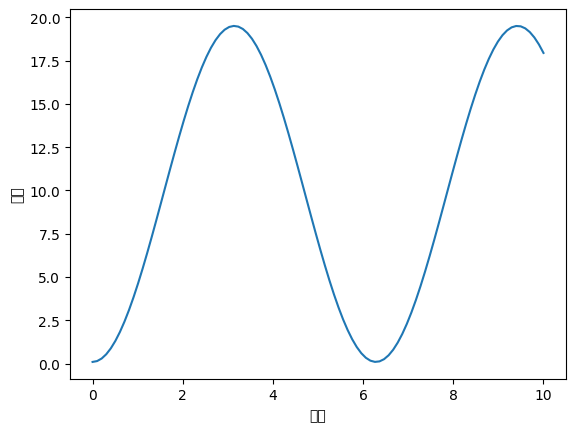

In [20]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 定义偏微分方程的右侧函数
def dudt(u, t, k, g):
    return [u[1], g - k * u[0]]

# 定义弹簧的参数
L = 1.0  # 弹簧的长度
m = 1.0  # 弹簧的质量
k = 1.0  # 弹簧的弹性系数
g = 9.8  # 重力加速度

# 定义初始条件
u0 = [0.1, 0.0]  # 初始位移和速度

# 定义时间网格
t = np.linspace(0, 10, 100)

# 求解偏微分方程
sol = odeint(dudt, u0, t, args=(k, g))

# 绘制位移随时间变化的图像
plt.plot(t, sol[:, 0])
plt.xlabel('时间')
plt.ylabel('位移')
plt.show()

In [18]:
print(sol)

[[ 0.1         0.        ]
 [ 0.14944269  0.97813266]
 [ 0.29726671  1.94629389]
 [ 0.54196511  2.89461388]
 [ 0.8810433   3.81342511]
 [ 1.31104461  4.69336088]
 [ 1.82758548  5.5254508 ]
 [ 2.42540007  6.30121224]
 [ 3.09839405  7.01273681]
 [ 3.83970665  7.65277093]
 [ 4.64178068  8.2147899 ]
 [ 5.49643948  8.69306427]
 [ 6.39497037  9.08271835]
 [ 7.32821338  9.37977986]
 [ 8.28665469  9.58122045]
 [ 9.2605236   9.68498655]
 [10.23989212  9.69002033]
 [11.21477621  9.59627048]
 [12.17523763  9.40469275]
 [13.11148499  9.1172401 ]
 [14.01397385  8.73684295]
 [14.8735039   8.2673792 ]
 [15.68131278  7.71363473]
 [16.42916539  7.08125464]
 [17.10943785  6.37668562]
 [17.71519521  5.60711032]
 [18.24026215  4.78037408]
 [18.67928597  3.90490494]
 [19.02779107  2.98962776]
 [19.28222467  2.04387321]
 [19.43999299  1.07728266]
 [19.49948766  0.0997099 ]
 [19.46010219 -0.87887935]
 [19.32223809 -1.84850898]
 [19.08730078 -2.79929424]
 [18.7576853  -3.72154246]
 [18.33675188 -4.60585191]
 

In [20]:
from sympy import symbols, Eq, solve, nsolve, exp, cos, sin, I
import sympy
import math
import time
theta2, theta3 = symbols('theta2 theta3')
l1 = 1
l2 = 1
l3 = 1
l4 = 1
theta1 = 3.14/2
theta4 = 0

# 定义方程
# eqs = Eq(l1*exp(I*theta1) + l2*exp(I*theta2) + l3*exp(I*theta3), l4*exp(I*theta4))
eqs = [Eq(l1*cos(theta1)+l2*cos(theta2),l4+l3*cos(theta3)),
       Eq(l1*sin(theta1)+l2*sin(theta2),l3*sin(theta3))]
X0 = [0.1, 1.2]
start = time.time()
print(solve(eqs, [theta2, theta3]))
end = time.time()
print('time',end - start)

start = time.time()
print(nsolve(eqs, [theta2, theta3],X0))
end = time.time()
print('time',end - start)

[(-3.79739711260553e-16, 1.57000000000000), (4.71159265358979, 3.14159265358979)]
time 0.7646756172180176
Matrix([[9.93741998149768e-18], [1.57000000000000]])
time 0.007879972457885742


In [5]:
from scipy.optimize import fsolve
import time
import math

l1 = 1
l2 = 1
l3 = 1
l4 = 1
theta1 = 3.14/2

def f(X):
    theta2 = X[0]
    theta3 = X[1]
    return [l1*math.cos(theta1)+l2*math.cos(theta2)-l4-l3*math.cos(theta3),
            l1*math.sin(theta1)+l2*math.sin(theta2)-l3*math.sin(theta3)]

X0 = [0.1, 1.2]

start = time.time()
result = fsolve(f, X0)
print(result)
end = time.time()
print('time',end - start)

[-2.64322751e-12  1.57000000e+00]
time 0.006127119064331055


In [14]:
lst1 = [0] * 10

print(lst1)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
